# SVG 지도시각화(전국)

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import jenkspy
import requests
import numpy as np
from pandas import read_excel
from IPython.display import SVG
from bs4 import BeautifulSoup

### [2] 데이터 불러오기

전국 인구수 조사 데이터 (단위 : 천명, 명/㎢)

> 출처: e-나라지표 (통계청「장래인구추계 시도편 : 2020-2050」, 국토교통부「지적통계」)

In [2]:
origin = read_excel("https://data.hossam.kr/mapdata/population.xlsx", index_col="지역")
origin

2018년  2019년  2020년  2021년  2022년
지역                                   
서울   9697   9657   9618   9502   9411
부산   3403   3381   3356   3327   3299
대구   2449   2437   2414   2388   2363
인천   2936   2952   2951   2941   2961
광주   1488   1489   1480   1469   1463
대전   1513   1503   1492   1479   1472
울산   1153   1146   1139   1124   1113
세종    302    329    348    366    383
경기  13027  13241  13452  13612  13681
강원   1521   1520   1519   1520   1526
충북   1618   1629   1631   1632   1634
충남   2177   2189   2177   2177   2180
전북   1823   1812   1806   1794   1780
전남   1796   1793   1793   1783   1769
경북   2675   2671   2652   2641   2628
경남   3351   3350   3340   3318   3289
제주    655    664    669    673    676

## #02. 데이터 전처리

### [1] 필요한 변수만 추출

In [3]:
df = origin[["2022년"]]
df

2022년
지역       
서울   9411
부산   3299
대구   2363
인천   2961
광주   1463
대전   1472
울산   1113
세종    383
경기  13681
강원   1526
충북   1634
충남   2180
전북   1780
전남   1769
경북   2628
경남   3289
제주    676

### [2] 데이터 구간 나누기

#### Jenks Natural Breaks

GIS 분야에서 많이 사용하는 데이터의 구간을 나누는 방법.

데이터의 구간 수를 지정하면 값이 비슷한 항목끼리 그룹을 만드는 알고리즘으로 "시각화"라는 기준에서 봤을 때 사람의 눈이 가장 "자연스럽다"라고 느끼는 것에 초점을 두는 분류 방법이다.

1차원 데이터에 대한 k-means clustering 알고리즘과 같은 방식으로 작동한다.

1. 그룹의 갯수와 각 그룹의 중심값을 임의로 정함
2. 각 데이터 별로, 가장 가까운 중심값을 찾아 그룹을 할당
3. 할당된 결과를 가지고 그룹의 중심점을 재계산
4. `2~3`을 반복

![img](res/img.gif)

In [4]:
bins = jenkspy.jenks_breaks(df['2022년'], n_classes=7)
bins

[383, 676, 1113, 1780, 2628, 3299, 9411, 13681]

## #03. 지도 이미지 가져오기

https://data.hossam.kr/mapdata/map_korea.svg

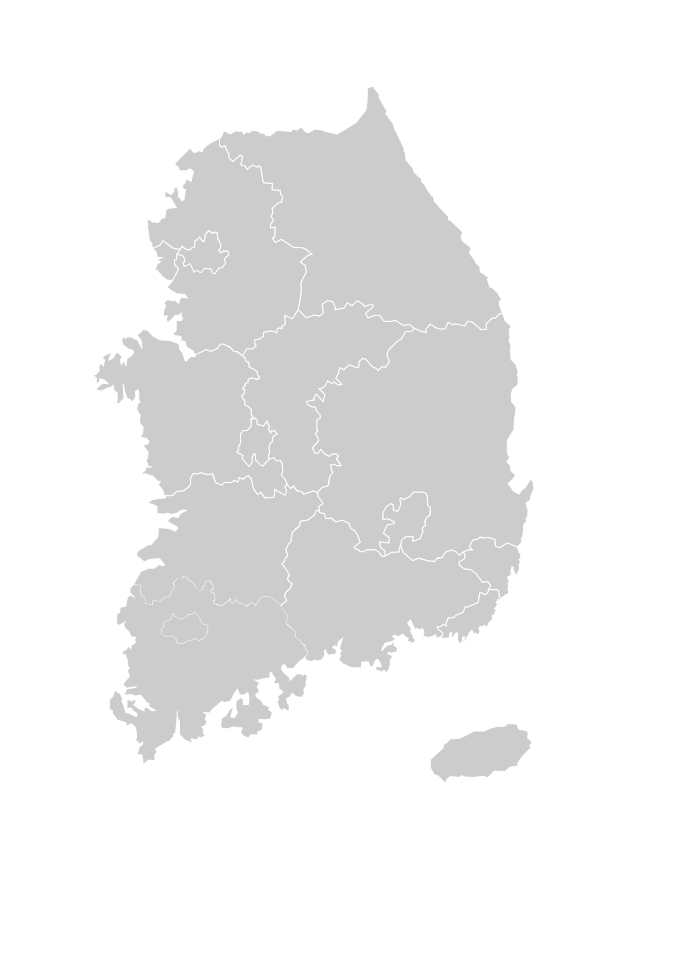

In [5]:
session = requests.Session()

r = session.get('https://data.hossam.kr/mapdata/map_sido.svg')

# 결과 검사
if r.status_code != 200:
    # 에러코드와 에러메시지를 문자열로 구성
    err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
    # 강제로 에러를 발생시킨다.
    raise Exception(err_msg)

map_svg = r.text
SVG(map_svg)

## #04. 데이터 시각화

### [1] 단계별 색상 팔레트 만들기

In [6]:
colors = ['#e6f7ed', '#c3ead2', '#9cddb6', '#70d09a', '#4cc584', '#1aba6e', '#10ab63']
colors

['#e6f7ed', '#c3ead2', '#9cddb6', '#70d09a', '#4cc584', '#1aba6e', '#10ab63']

### [2] BeautifulSoup 객체 생성 및 시/도 단위 추출

In [7]:
soup = BeautifulSoup(map_svg)
path_list = soup.select('path[name]')
path_list[0]

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<path d="M183.5,256.583l1.188,4.667L183,263.083l1.375,3.792l2.938-1.313
					l2.5-1.563l0.75,1l3.271,7.417l2.917-1.729l2.75,1.896l2.125,0.104l3.5-3.938l5.541,0.333l1.521,4.167l2.646,0.833L218.25,269
					l0.75-0.75l3-0.167l0.084-0.25l3.75-4.583l-1.168-3v-0.5l0.334-1.5l3.834-2.833l-0.334-2.5l-0.834-1.667L224,250.917l-3.25,2
					l-1.843-2.71l1.927-1.873l-0.168-3.917l-0.239-0.526l0.239,0.026l-3-5.333l-0.5-6l-3-0.333L214,232.604l-1.541,0.771
					l-3.855-2.583l-1.083,1.5l0.004,0.012l-2.358,2.28l-0.833,5l0.06,0.786l-0.727,1.131l-1.229-0.5l-0.001,0.001l-1.103-1.085
					l-1.583-3.042l-2.75,2.938l-2.188,0.813l-0.375,6.125l-2.125,0.938l-2.438,2.188l-2.188-0.125l-1.313-0.188l-4.5-3.063
					l-4.792,7.333l6.229,2.604L183.5,256.583z" fill="#CCCCCC" id="svgSeoul" name="서울" stroke="#FFFFFF"></path>

### [3] 지도에서 확인한 지역명 수 만큼 반복

In [10]:
# for p in path_list:
#     print(p)

In [8]:
for p in path_list:
    #print(p)

    지역명 = p['name']
    인구수 = df.loc[지역명, '2022년']
    print(지역명, 인구수)

    for i, v in enumerate(bins):
        if 인구수 <= v:
            color_index = i-1
            break

    p['fill'] = colors[color_index]

서울 9411
인천 2961
경기 13681
충북 1634
충남 2180
강원 1526
광주 1463
대전 1472
울산 1113
경북 2628
경남 3289
부산 3299
제주 676
대구 2363
전북 1780
전남 1769


### [4] 재구성된 내용을 토대로 새로운 svg 소스코드 얻기

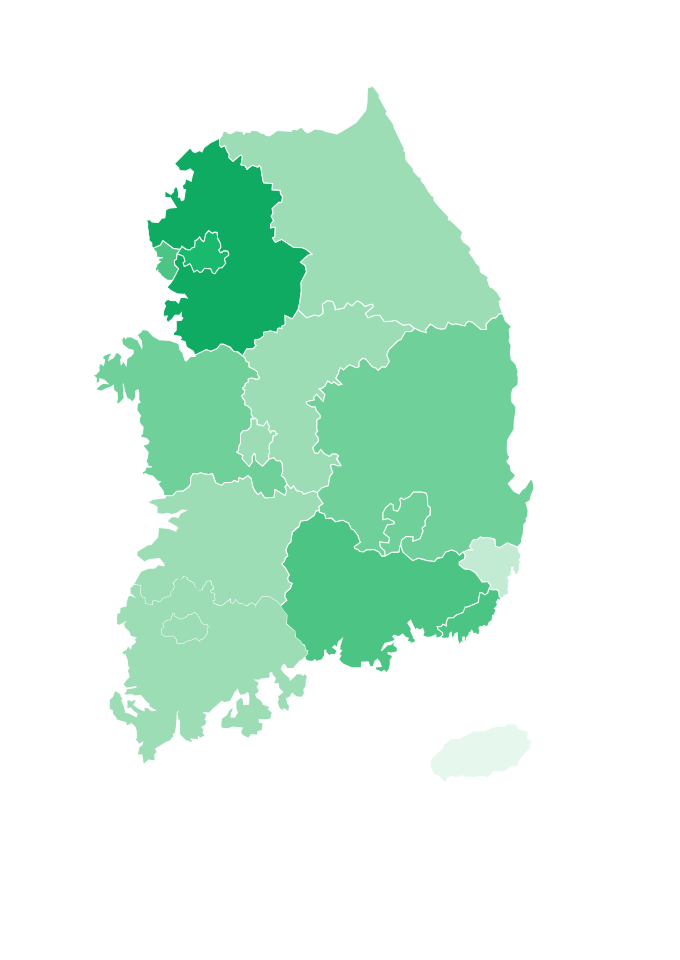

In [11]:
# bs4 객체의 내용을 문자열로 리턴
new_seoul_svg = soup.prettify()

# jupyter에서 svg 이미지 표시하기
# 사용방법 -> SVG(소스문자열)  혹은   SVG(파일경로)
SVG(new_seoul_svg)